Accuracy Score:  0.625

Confusion Matrix
 [[1 0 0]
 [0 1 0]
 [2 1 3]]
Feature Importance: [age,spectacle,astigmatic,tear production rate][0.         0.         0.36571429 0.63428571]
|--- feature_3 <= 1.50
|   |--- class: 3
|--- feature_3 >  1.50
|   |--- feature_2 <= 1.50
|   |   |--- class: 2
|   |--- feature_2 >  1.50
|   |   |--- class: 1



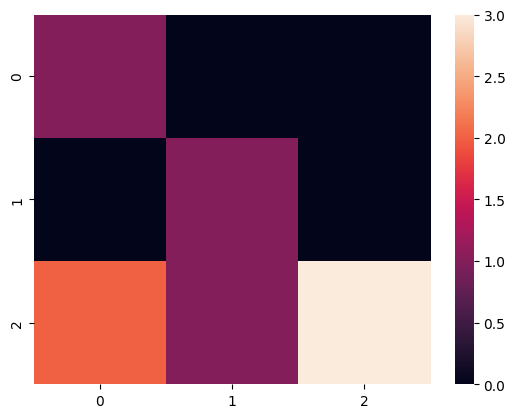

In [21]:
'''Exercise 3
Given the following data set: lenses.csv, use a Decision Tree Classifier to predict whether a
patient should be prescribed hard contact lenses, soft contact lenses, no contact lenses. Compute the
accuracy score of the model and print the classification report as well as the Confusion Matrix
both in text and as a heatmap (use test_size=0.3). In addition, print the most important features.
Finally, create a visualization of the decision tree. Ignore the first column; the last column is the
target (see file: lenses.names)'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
names=['n/a','age','spectacle','astigmatic','tear production rate','Class']
df = pd.read_csv('/content/lenses.csv',names=names)
df.drop(df.columns[[0]], axis=1, inplace=True)
X = np.array(df.iloc[:, 0:4])
y = np.array(df.iloc[:, 4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
print ('Accuracy Score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))
print(f'Feature Importance: [age,spectacle,astigmatic,tear production rate]{DT.feature_importances_}')
dot_data=tree.export_graphviz(DT, out_file=None, feature_names=['age','spectacle','astigmatic','tear_production_rate'], class_names=['no','soft','hard'], filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('lenses_dt', view=True)
text_representation = tree.export_text(DT)
print(text_representation)
sns.heatmap(confusion_matrix(y_test, pred))
plt.show()